# Figure S4. Manhattan plots for single variant association analysis of the Mega sample

In [ ]:
plots <- function(file,annofile,trait,out){
library('dplyr')
library('ggrepel')
library('tidyr')
library('ggplot2')
#Load your data
gwas <- read.table(gzfile(file),sep='\t', header=T)
snpsOfInterest <- gwas %>%
filter(P< 5e-08)
annot <- read.csv(annofile)
annot <- annot %>%
select("alternate_id", "Gene.refGene", "avsnp150") %>%
separate("Gene.refGene", "Gene") %>%
rename(SNP = alternate_id)
# Merge snps of interest with the annotation info
snps_annot <- merge(snpsOfInterest,annot,by="SNP")
# Prepare the dataset
dat <- gwas %>%  
# Compute chromosome size
group_by(CHR) %>% 
summarise(chr_len=max(POS)) %>%
# Calculate cumulative position of each chromosome
mutate(tot=cumsum(as.numeric(chr_len))- as.numeric(chr_len)) %>%
select(-chr_len) %>%      
# Add this info to the initial dataset
left_join(gwas, ., by=c("CHR"="CHR")) %>%
# Add a cumulative position of each SNP
arrange(CHR, POS) %>%
mutate(BPcum=POS+tot) %>%  
# Add highlight and annotation information
mutate(is_highlight=ifelse(SNP %in% snpsOfInterest$SNP, "yes", "no")) %>%
mutate(is_annotate=ifelse(P<5e-08, "yes", "no")) %>%
# Filter SNP to make the plot lighter
filter(-log10(P)>0.05)
# Merge the gwas filtered data with the annotation
dat_anno <- merge(x = dat, y = snps_annot[ , c("SNP", "Gene", "avsnp150")], by = "SNP", all.x=TRUE)
gene_anno <- dat_anno %>% 
  filter(!is.na(Gene)) %>%
  group_by(Gene) %>% 
  slice_min(order_by=P)
dat_anno <- dat_anno %>% mutate(is_top = ifelse(SNP %in% gene_anno$SNP, "yes", "no"))
# Create axis for the manhattan plot
axisdf = dat %>% group_by(CHR) %>% summarize(center=( max(BPcum) + min(BPcum) ) / 2 )
# Make the plot
sig <- 5e-08
#if (0 == 0) ylim <- abs(floor(log10(min(dat$'P')))) + 2
ylim <- 22
y_limits <- c(8, ylim)
dat_anno$color=ifelse(dat_anno$CHR%%2 ==0 , "gray", "black")
dat_anno$genegroup=ifelse(dat_anno$CHR%%2 ==0 , "Other1", "Other2")

manhplot <- ggplot(dat_anno, aes(x=BPcum, y=-log10(P), 
                             color = as.factor(CHR), size = -log10(P))) +
    # Show all points
    geom_point( aes(color=as.factor(CHR)), alpha=0.8, size=1.3) +
    # custom X axis:
    scale_x_continuous(label = axisdf$CHR, breaks= axisdf$center) +
    scale_y_continuous(expand = c(0, 0), limits=c(NA, ylim)) +   # remove space between plot area and x axis
    # Add highlighted points
    #geom_point(data=subset(dat_anno, is_highlight=="yes"), color="red", size=2) +

    # Add different color geom_points
    #geom_point(data=dat_anno[(dat_anno$genegroup=="Other1"),],color="gray", alpha=0.8, size=1.3) + 
    #geom_point(data=dat_anno[(dat_anno$genegroup=="Other2"),],color="black", alpha=0.8, size=1.3) +
    #geom_point(data=subset(dat_anno, is_highlight=="yes"),aes(color=genegroup), alpha=0.8, size=1.3) +
    scale_color_manual(values = c("#FFC20A","#D41159","#39A2FA","#1AFF1A","#4B0092",
                                "#994F00","#006CD1","#D35FB7","#E1BE6A","#40B0A6",
                                "#003AB5","#DC3220","#E66100","#5D3A9B","#1A85FF",
                                "#24E1A4","#E43034","#FFB000","#80BBA2","#E799D6",
                                "#5D5A10","#980EA0")) +
    # Add significance level line
    geom_hline(yintercept = -log10(sig), color = "red1", linetype = "dashed") +
    # Add label using ggrepel to avoid overlapping, if annotate option is used label the top snps in each gene  
    geom_label_repel( data=subset(dat_anno, is_top=="yes"),
                      #fill=subset(dat_anno, is_top=="yes")$color,
                      aes(label=Gene), size=4, fontface = "italic",  max.overlaps = Inf, ylim = y_limits, box.padding = unit(0.35, "lines"), point.padding = unit(0.5, "lines")) +
    #create X and Y axes labels
    labs(x = "Chromosome",
     y = "-log10(p)") +
    # Custom the theme:
    theme_classic() +
    theme( 
      legend.position="none",
      panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      axis.text.x = element_text(angle = 90, size = 8, vjust = 0.5))
# To save a plot created with ggplot2 you have to use to print() function
png(out, width = 6, height = 4, unit='in', res=300)
print(manhplot)
dev.off()
}

## Panel A. H-aid

In [ ]:
file <- "~/UKBiobank/results/REGENIE_results/results_exome_data/090921_f3393_hearing_aid_200K/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2_f3393.regenie.snp_stats.gz"
annofile <- "~/UKBiobank/results/REGENIE_results/results_exome_data/090921_f3393_hearing_aid_200K/091321_annotation/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2_f3393.regenie.hg38_multianno.formatted.csv"
trait <- "f3393"
out <- "~/UKBiobank/results/REGENIE_results/results_exome_data/042622_paper_manhattan/200k.f3393.png"
plots(file,annofile,trait,out)

> /home/dmc2245/UKBiobank/results/REGENIE_results/results_exome_data/042622_paper_manhattan/200k.f3393.png (369.6 KiB):

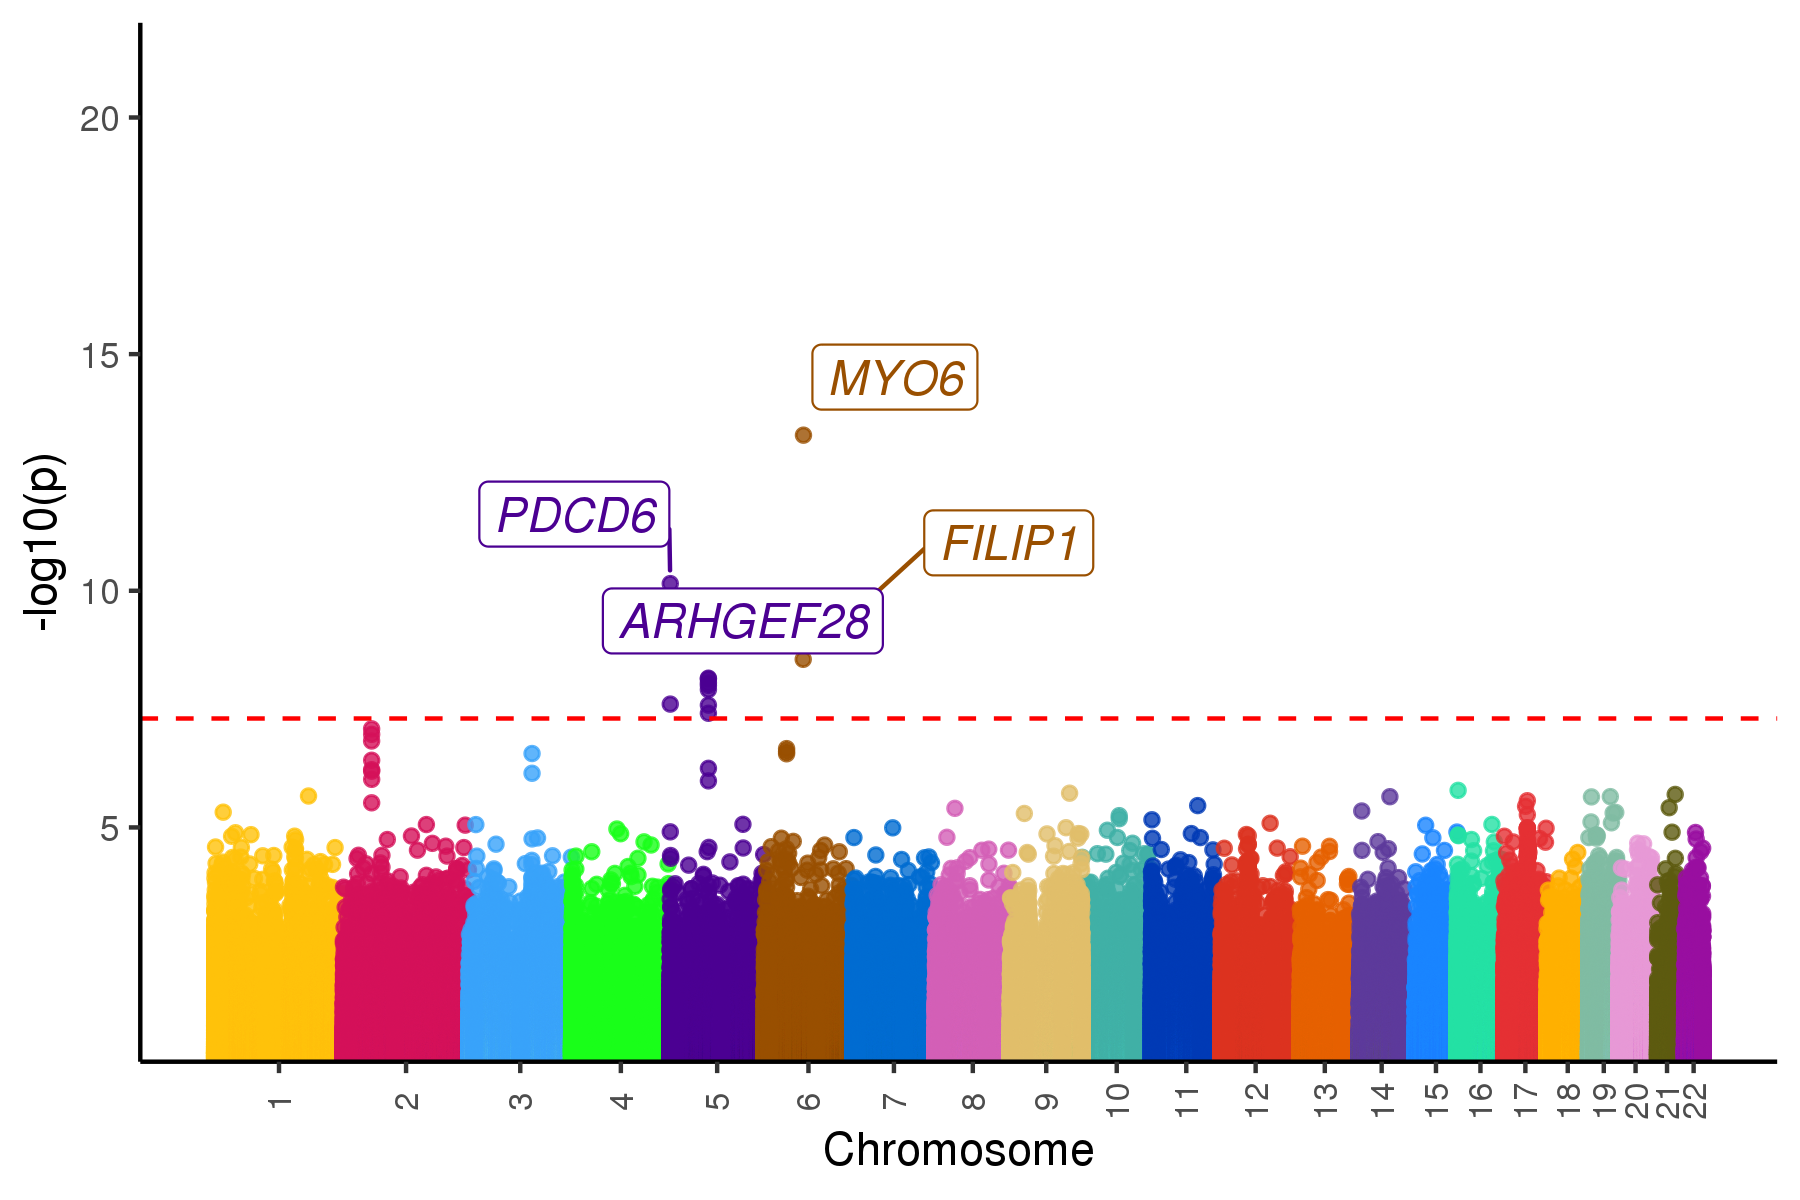

In [1]:
%preview ~/UKBiobank/results/REGENIE_results/results_exome_data/042622_paper_manhattan/200k.f3393.png -n

## Panel B. H-diff

In [ ]:
file <- "~/UKBiobank/results/REGENIE_results/results_exome_data/090921_f2247_hearing_difficulty_200K/090321_UKBB_Hearing_difficulty_f2247_expandedwhite_45502cases_96601ctrl_PC1_2_f2247.regenie.snp_stats.gz"
annofile <- "/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/102121_f2247_hearing_difficulty/102121_annotation/090321_UKBB_Hearing_difficulty_f2247_expandedwhite_45502cases_96601ctrl_PC1_2_f2247.regenie.hg38_multianno.formatted.csv"
trait <- "f2247"
out <- "~/UKBiobank/results/REGENIE_results/results_exome_data/042622_paper_manhattan/200k.f2247.png"
plots(file,annofile,trait,out)

> /home/dmc2245/UKBiobank/results/REGENIE_results/results_exome_data/042622_paper_manhattan/200k.f2247.png (404.0 KiB):

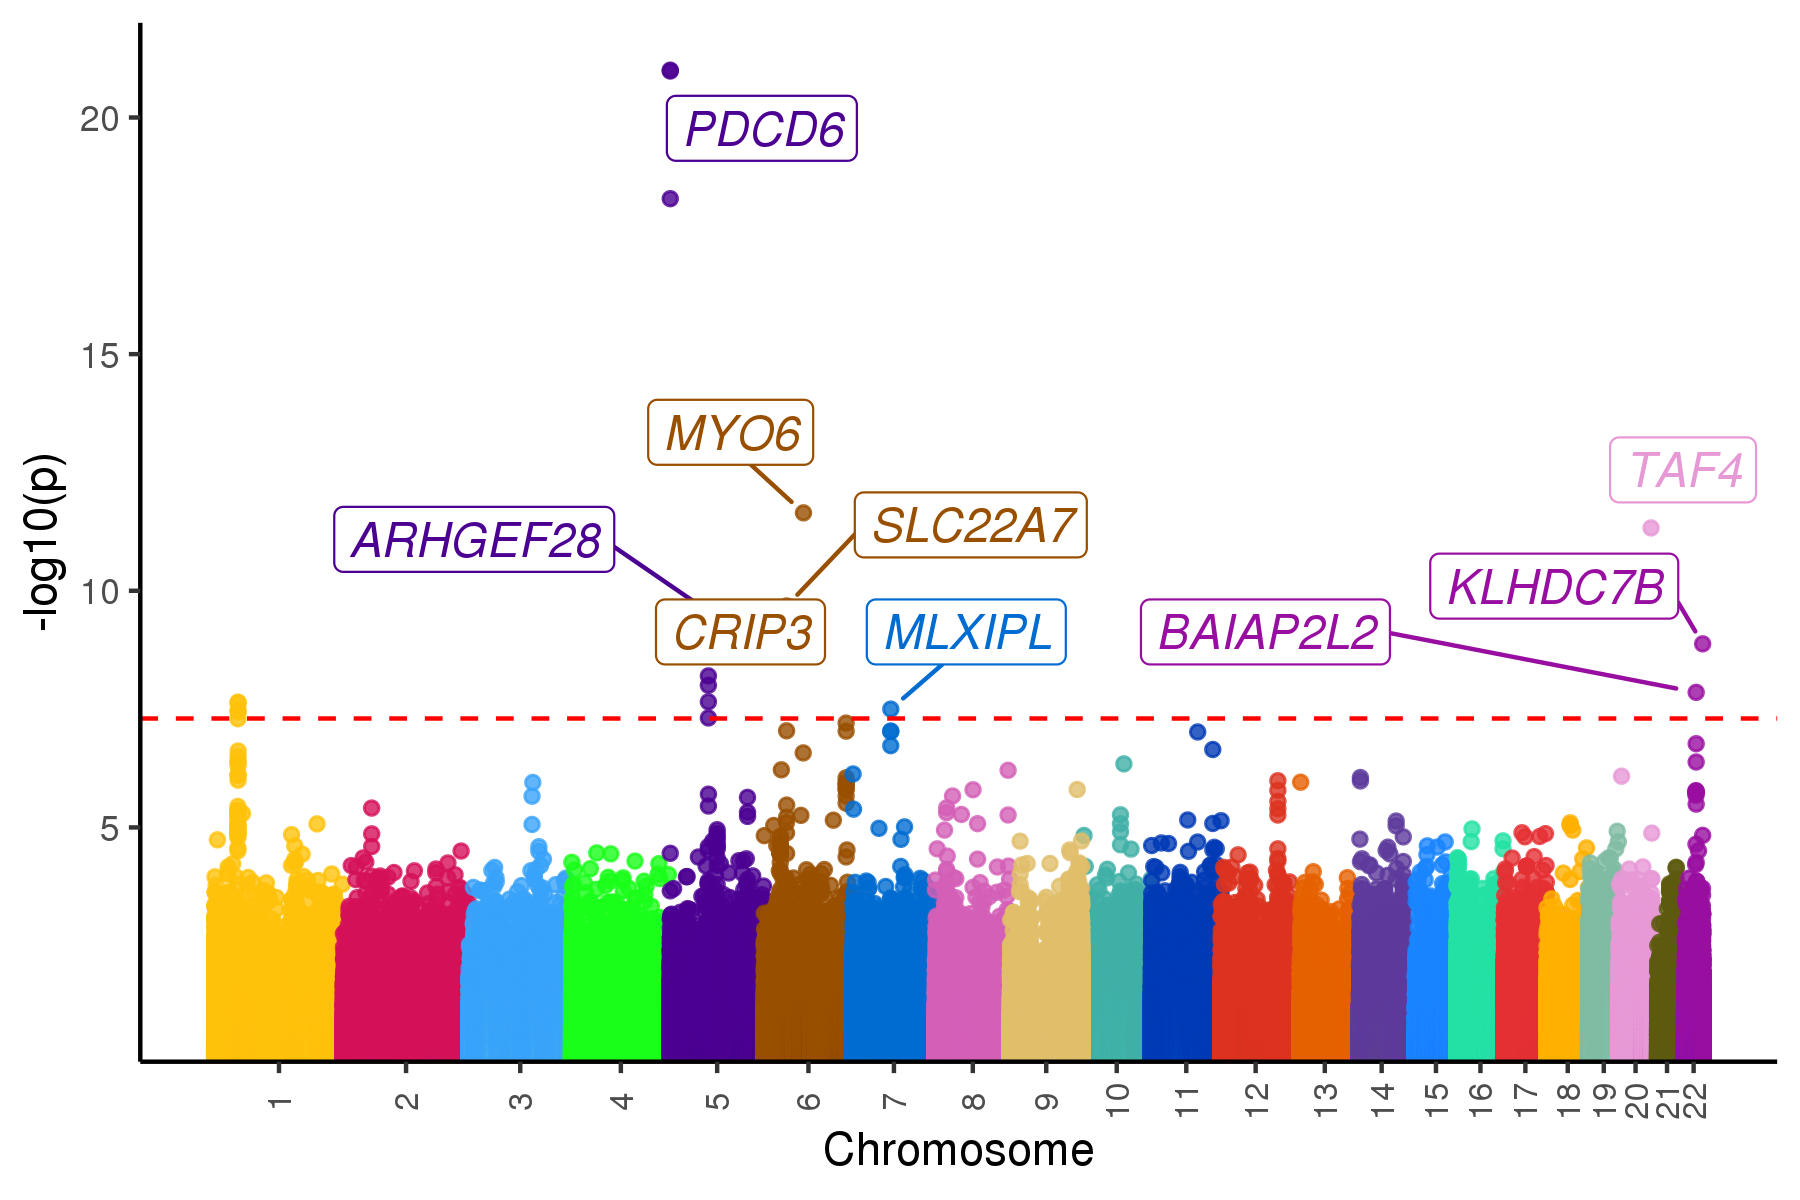

In [2]:
%preview ~/UKBiobank/results/REGENIE_results/results_exome_data/042622_paper_manhattan/200k.f2247.png -n 

## Panel C. H-noise

In [25]:
file <- "~/UKBiobank/results/REGENIE_results/results_exome_data/090921_f2257_hearing_noise_200K/090321_UKBB_Hearing_noise_f2257_expandedwhite_65660cases_96601ctrl_PC1_2_f2257.regenie.snp_stats.gz"
annofile <- "~/UKBiobank/results/REGENIE_results/results_exome_data/090921_f2257_hearing_noise_200K/091321_annotation/090321_UKBB_Hearing_noise_f2257_expandedwhite_65660cases_96601ctrl_PC1_2_f2257.regenie.hg38_multianno.formatted.csv"
trait <- "f2257"
out <- "~/UKBiobank/results/REGENIE_results/results_exome_data/042622_paper_manhattan/200k.f2257.png"
plots(file,annofile,trait,out)

> /home/dmc2245/UKBiobank/results/REGENIE_results/results_exome_data/042622_paper_manhattan/200k.f2257.png (352.0 KiB):

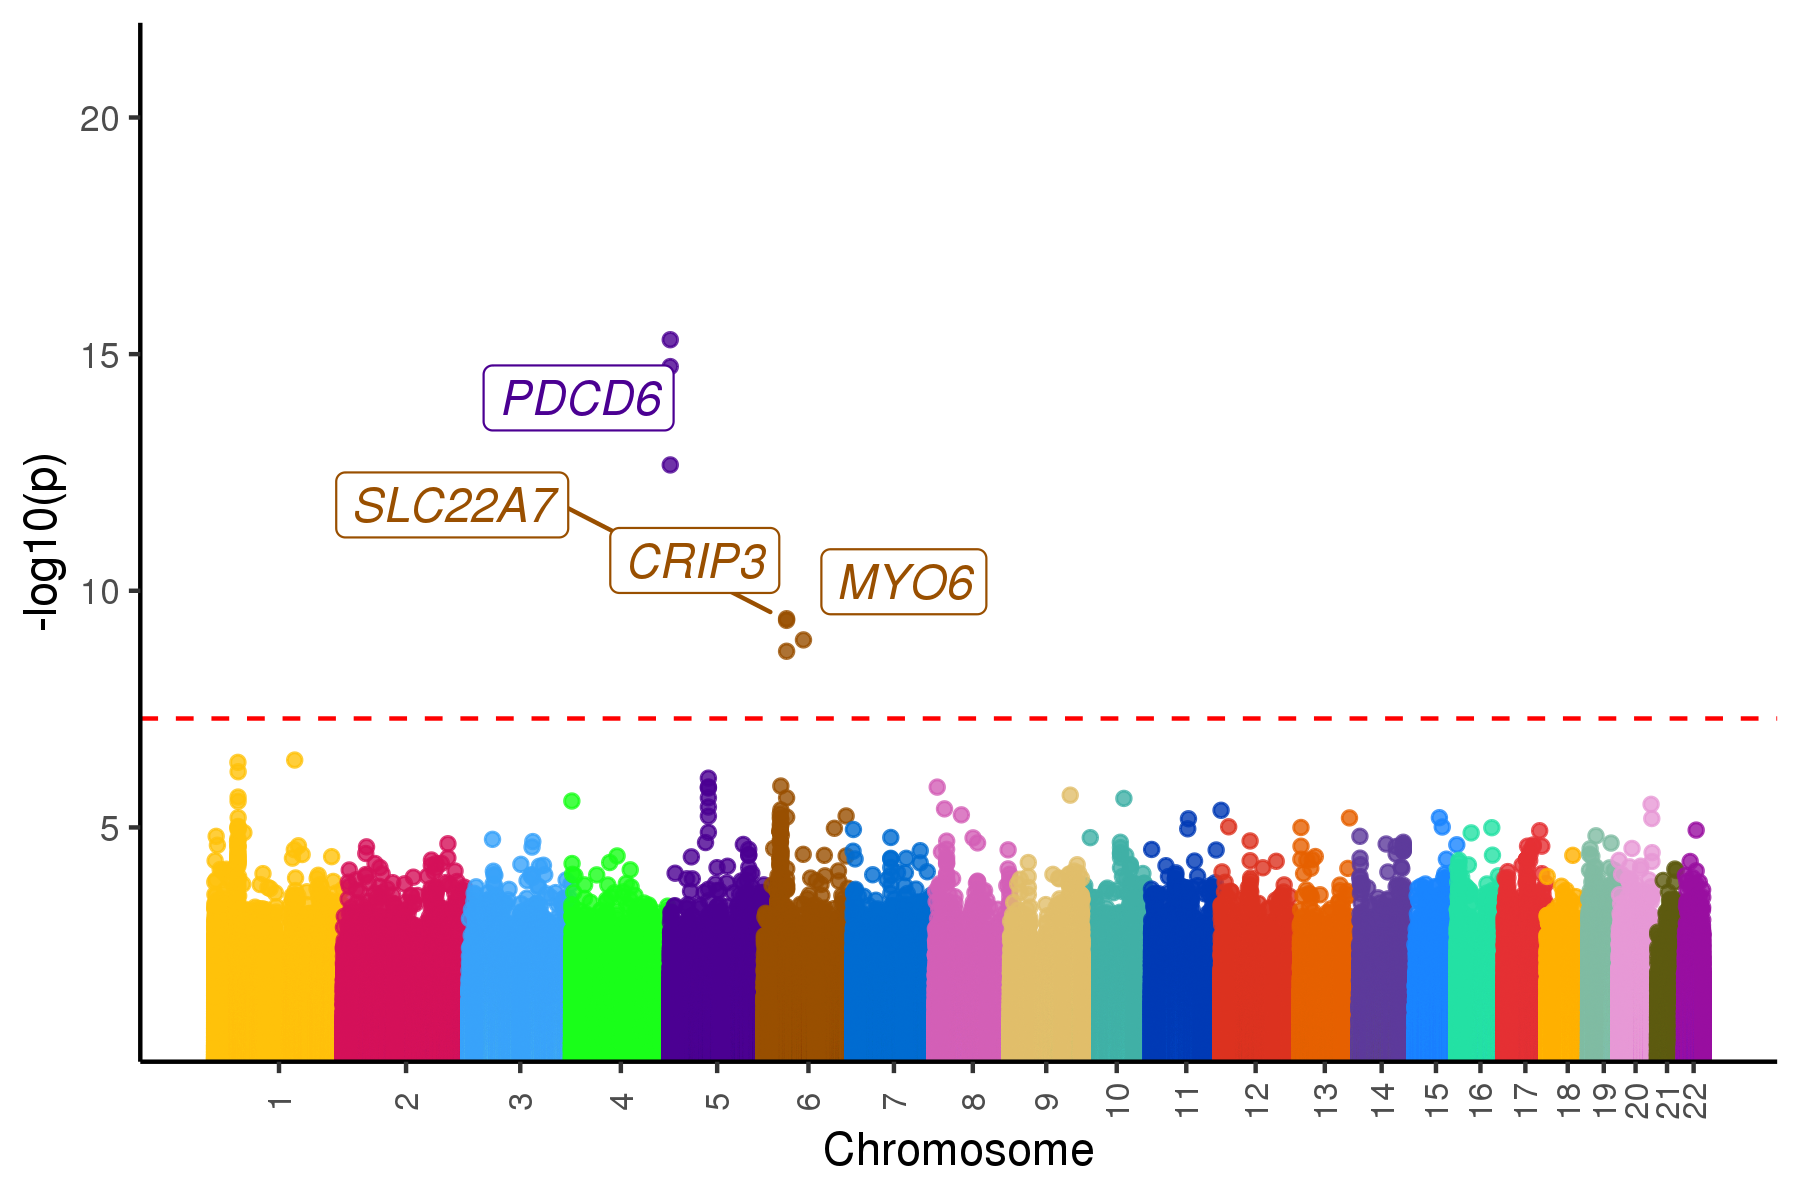

In [3]:
%preview ~/UKBiobank/results/REGENIE_results/results_exome_data/042622_paper_manhattan/200k.f2257.png -n 

## Panel D. H-both

In [ ]:
file <- "~/UKBiobank/results/REGENIE_results/results_exome_data/090921_combined_f2247_f2257_200K/090321_UKBB_Combined_f2247_f2257_expandedwhite_38410cases_96601ctrl_PC1_2_f2247_f2257.regenie.snp_stats.gz"
annofile <- "~/UKBiobank/results/REGENIE_results/results_exome_data/090921_combined_f2247_f2257_200K/091321_annotation/090321_UKBB_Combined_f2247_f2257_expandedwhite_38410cases_96601ctrl_PC1_2_f2247_f2257.regenie.hg38_multianno.formatted.csv"
trait <- "f2247_f2257"
out <- "~/UKBiobank/results/REGENIE_results/results_exome_data/042622_paper_manhattan/200k.f2247_f2257.png"
plots(file,annofile,trait,out)

> /home/dmc2245/UKBiobank/results/REGENIE_results/results_exome_data/042622_paper_manhattan/200k.f2247_f2257.png (410.1 KiB):

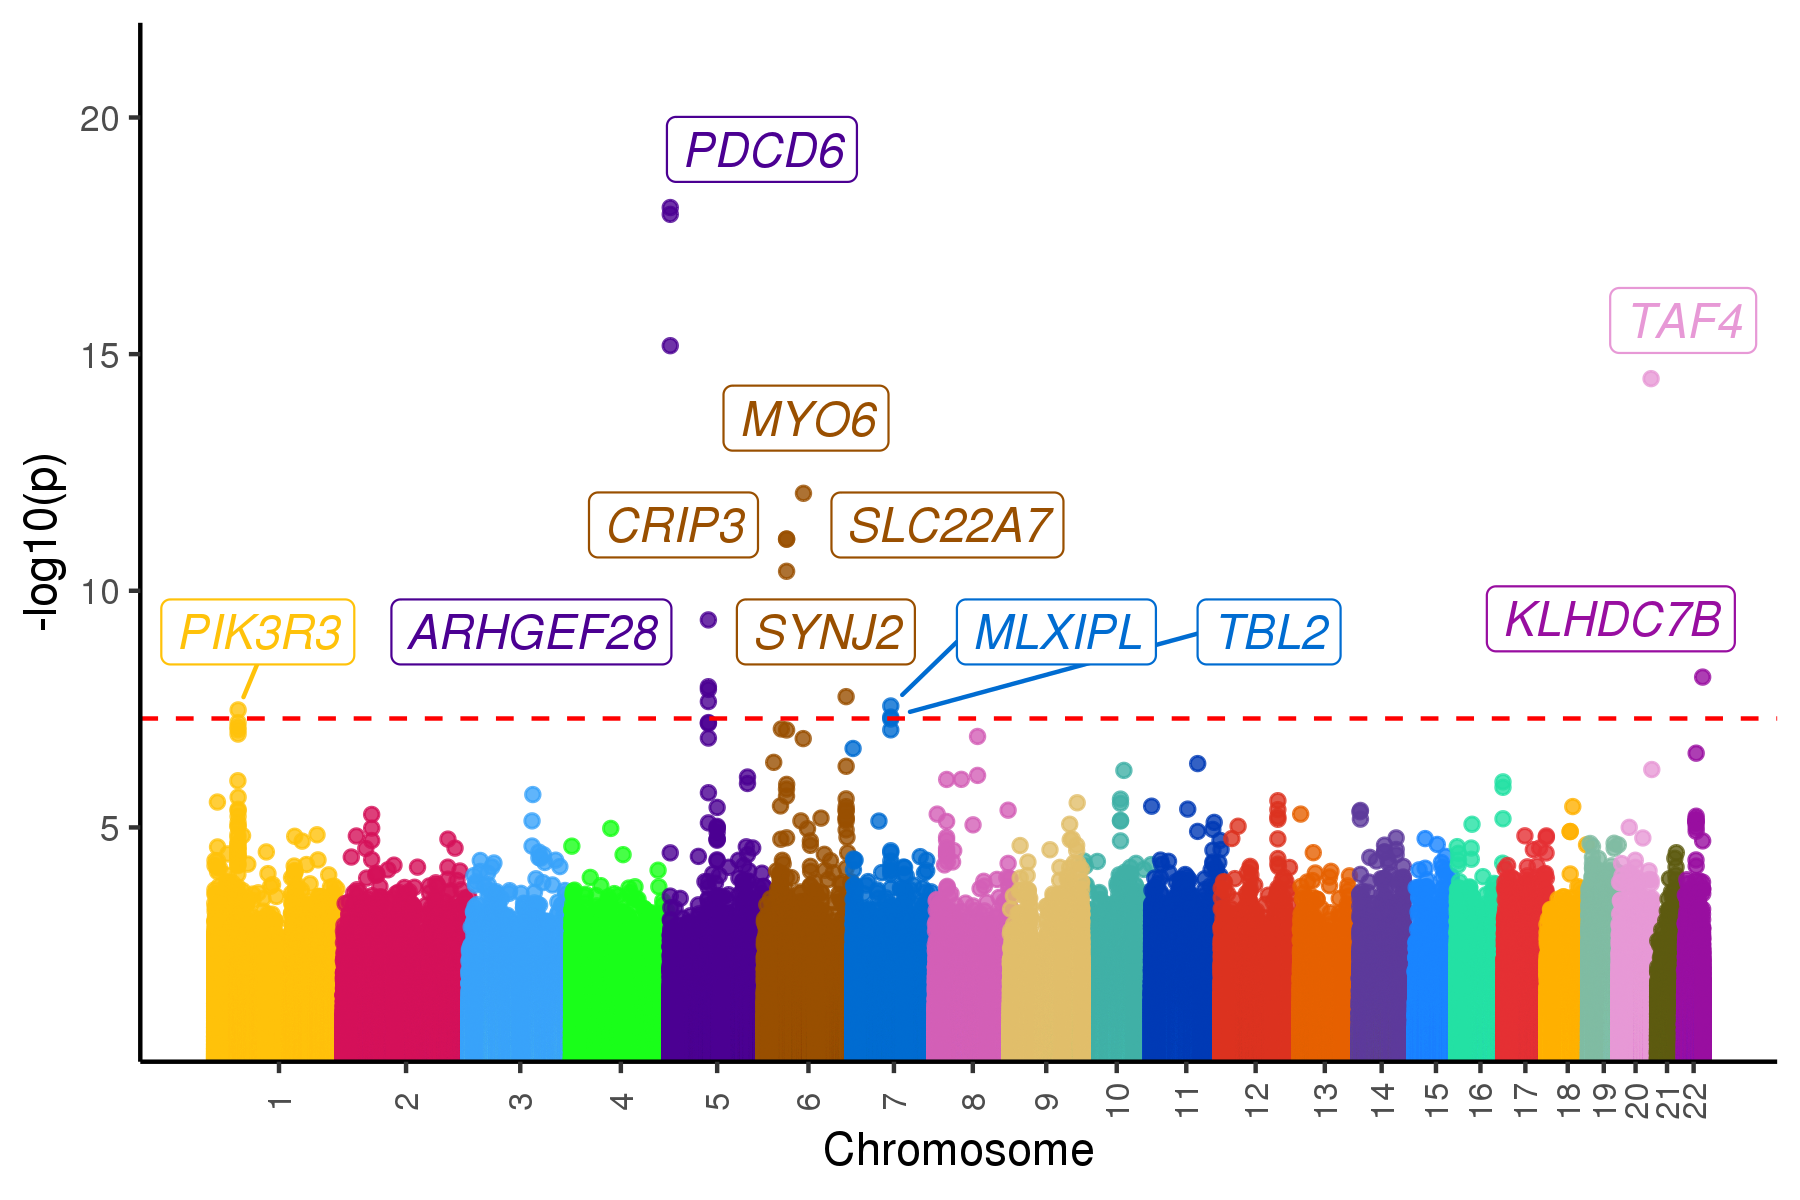

In [4]:
%preview ~/UKBiobank/results/REGENIE_results/results_exome_data/042622_paper_manhattan/200k.f2247_f2257.png -n 